In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [41]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#It is impossible for BMI,Glucose,Blood pressure to have a value zero.

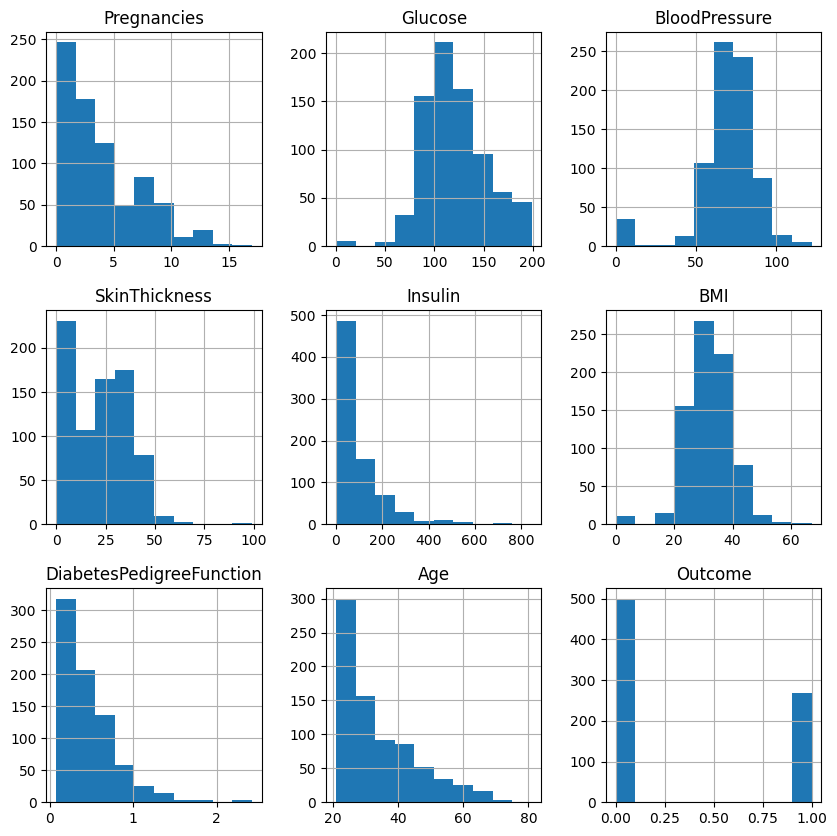

In [48]:
df.hist(figsize=(10,10))
plt.show()

In [ ]:
#some individuals have up to 15 pregnancies.
         #Although this information is not unlikely,it still needs to be taken into account.
#The data set indicates that 35% of the population has diabetes.
         #According to WHO estimation,only 10.5% of world population suffers from diabetes.

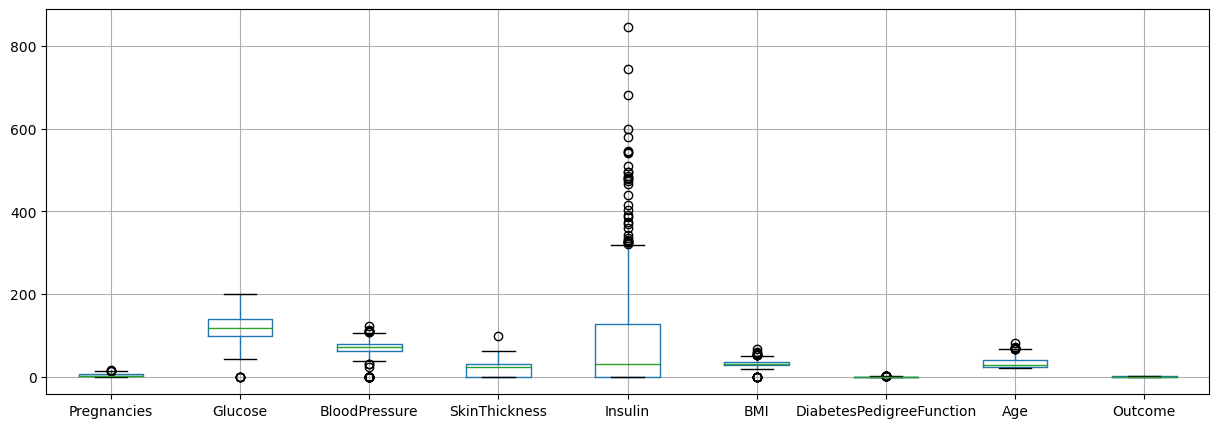

In [ ]:
df.boxplot(figsize=(15,5))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
correlation=df.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [19]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
model=LogisticRegression()
model.fit(x_train,y_train)

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
prediction=model.predict(x_test)
print(prediction)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0
 1 1 1 0 0 1]


In [29]:
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

0.7532467532467533


In [30]:
print(model.coef_)

[[ 0.11734474  0.03542788 -0.009643    0.00654705 -0.0015375   0.08097572
   0.45449718  0.01780387]]


In [31]:
print(model.intercept_)

[-8.34630238]
